In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Load Dateset

In [2]:
train = pd.read_csv("train.tsv",sep='\t')
train.shape

(89, 15)

In [3]:
train.head(n=50)

,id,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.650000,0.56,1.58,520
1,1,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.080000,0.92,3.12,365
2,3,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.040000,0.88,3.35,885
3,6,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.250000,1.12,2.51,1105
4,9,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.580000,1.13,3.20,830
5,11,3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.600000,0.77,2.31,600
6,12,3,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.600000,0.70,2.47,780
7,13,2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.900000,1.23,2.74,428
8,14,1,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.700000,1.18,2.69,1020
9,15,1,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.850000,0.92,3.20,1060


In [4]:
test = pd.read_csv("test.tsv",sep='\t')
test.shape

(89, 14)

In [5]:
train.head(n=50)

,id,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.650000,0.56,1.58,520
1,1,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.080000,0.92,3.12,365
2,3,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.040000,0.88,3.35,885
3,6,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.250000,1.12,2.51,1105
4,9,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.580000,1.13,3.20,830
5,11,3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.600000,0.77,2.31,600
6,12,3,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.600000,0.70,2.47,780
7,13,2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.900000,1.23,2.74,428
8,14,1,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.700000,1.18,2.69,1020
9,15,1,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.850000,0.92,3.20,1060


## Encoding categorical values

In [6]:
X = train.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14]]

In [7]:
X.head(n=50)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.650000,0.56,1.58,520
1,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.080000,0.92,3.12,365
2,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.040000,0.88,3.35,885
3,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.250000,1.12,2.51,1105
4,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.580000,1.13,3.20,830
5,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.600000,0.77,2.31,600
6,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.600000,0.70,2.47,780
7,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.900000,1.23,2.74,428
8,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.700000,1.18,2.69,1020
9,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.850000,0.92,3.20,1060


In [8]:
# One-Hot encoding
X = pd.get_dummies(X)

In [9]:
y = train[train.columns[1]]
y.head(n=50)

0     3
1     2
2     1
3     1
4     1
5     3
6     3
7     2
8     1
9     1
10    1
11    2
12    3
13    3
14    2
15    2
16    1
17    1
18    1
19    2
20    3
21    1
22    3
23    2
24    3
25    2
26    1
27    2
28    3
29    1
30    2
31    1
32    2
33    3
34    2
35    2
36    2
37    2
38    3
39    2
40    2
41    2
42    3
43    1
44    2
45    1
46    2
47    3
48    3
49    1
Name: Y, dtype: int64

In [10]:
X.head(n=50)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.650000,0.56,1.58,520
1,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.080000,0.92,3.12,365
2,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.040000,0.88,3.35,885
3,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.250000,1.12,2.51,1105
4,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.580000,1.13,3.20,830
5,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.600000,0.77,2.31,600
6,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.600000,0.70,2.47,780
7,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.900000,1.23,2.74,428
8,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.700000,1.18,2.69,1020
9,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.850000,0.92,3.20,1060


In [11]:
X.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,12.997079,2.280225,2.387640,19.617978,100.516854,2.319326,2.048315,0.357191,1.592584,5.087303,0.968315,2.604607,745.303371
std,0.823056,1.139636,0.305134,3.991086,14.281355,0.579058,1.004159,0.129930,0.616166,2.371440,0.229932,0.695820,318.135777
min,11.030000,0.740000,1.360000,10.600000,78.000000,1.300000,0.480000,0.130000,0.410000,1.900000,0.550000,1.290000,312.000000
25%,12.370000,1.570000,2.240000,16.800000,89.000000,1.850000,1.250000,0.260000,1.150000,3.270000,0.800000,2.010000,510.000000
50%,13.050000,1.780000,2.380000,19.600000,98.000000,2.360000,2.110000,0.340000,1.550000,4.680000,0.980000,2.780000,678.000000
75%,13.560000,2.990000,2.610000,22.000000,108.000000,2.800000,2.890000,0.470000,1.980000,6.000000,1.120000,3.160000,920.000000
max,14.830000,5.650000,3.230000,30.000000,151.000000,3.850000,5.080000,0.630000,2.960000,13.000000,1.710000,3.920000,1680.000000


In [12]:
print(X.shape)

(89, 13)


## Class ratio

In [14]:
from collections import Counter
print(Counter(y))

Counter({2: 37, 1: 28, 3: 24})


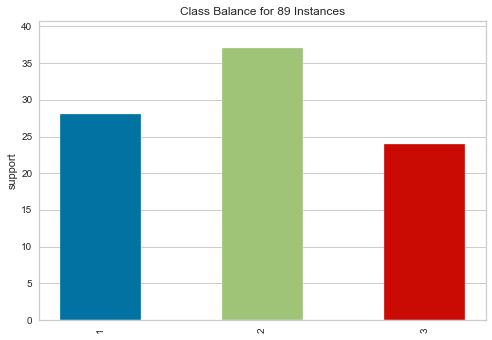

In [15]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

## correlation

C:\Users\Owner\Anaconda3\lib\site-packages\yellowbrick\features\rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


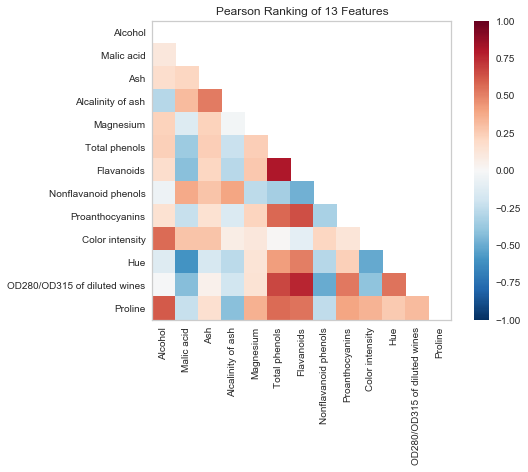

In [16]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(features=X.columns, algorithm='pearson')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

## Box plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

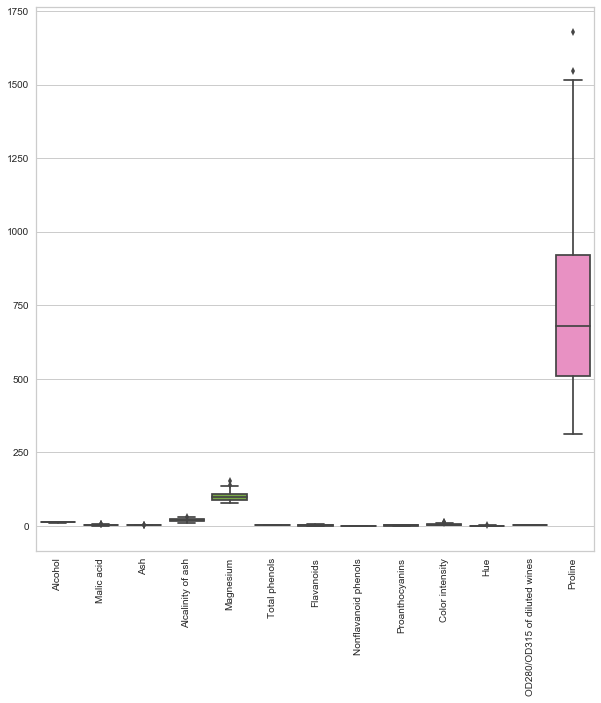

In [17]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)

## learning

In [18]:
X = np.array(X)
y = np.array(y)

# scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [20]:
# learning
kernel = ['linear', 'rbf', 'poly']
clf = []

for i in kernel:
    svm = SVC(C=1.0, gamma='auto', kernel=i, random_state=42)
    clf.append(svm.fit(X_train, y_train))

## evaluate

In [21]:
from sklearn import metrics

In [22]:
def calc_metrics(y_test, y_pred):
    pre = metrics.precision_score(y_test, y_pred, average='micro')
    recall = metrics.recall_score(y_test, y_pred, average='micro')
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='micro')
    metrics_list = [pre, recall, acc, f1]
    
    return metrics_list

In [23]:
result = []

for i in range(len(clf)):
    y_pred = clf[i].predict(X_test)
    result.append(calc_metrics(y_test, y_pred))

In [24]:
result_df = pd.DataFrame(result, columns=['Precision', 'Recall', 'Acc', 'F-score'])
result_df = result_df.assign(Kernel=kernel)
result_df = result_df[['Kernel', 'Precision', 'Recall', 'Acc', 'F-score']]
round(result_df, 3)

,Kernel,Precision,Recall,Acc,F-score
0,linear,0.944,0.944,0.944,0.944
1,rbf,0.944,0.944,0.944,0.944
2,poly,0.833,0.833,0.833,0.833


In [25]:
result_mlt = pd.melt(result_df, id_vars='Kernel', var_name='Metrics', value_name='values')
result_mlt

,Kernel,Metrics,values
0,linear,Precision,0.944444
1,rbf,Precision,0.944444
2,poly,Precision,0.833333
3,linear,Recall,0.944444
4,rbf,Recall,0.944444
5,poly,Recall,0.833333
6,linear,Acc,0.944444
7,rbf,Acc,0.944444
8,poly,Acc,0.833333
9,linear,F-score,0.944444


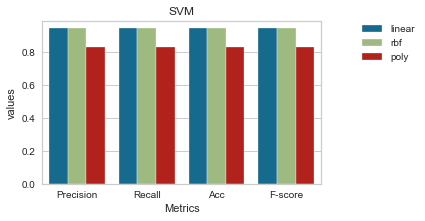

In [26]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Metrics', y='values', hue='Kernel', data=result_mlt)
plt.title('SVM')
plt.legend(loc='best', bbox_to_anchor=(1.35, 1), borderaxespad=0)

## grid seaach

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
tuning_parm = [
    {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
    {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']},
]

clf = GridSearchCV(SVC(), tuning_parm, cv=5, scoring='f1_micro', return_train_score=True)

In [29]:
clf.fit(X_train, y_train)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}, {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_micro', verbose=0)

In [30]:
grid_df = pd.DataFrame.from_dict(clf.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001604,0.001964,0.0,0.0,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",1.000000,0.818182,...,0.962264,0.073736,1,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000800,0.001601,0.0,0.0,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.833333,0.818182,...,0.924528,0.086339,4,0.975610,1.0,0.976744,0.930233,0.976744,0.971866,0.022744
2,0.000000,0.000000,0.0,0.0,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.500000,0.545455,...,0.509434,0.018434,13,0.512195,0.5,0.511628,0.511628,0.511628,0.509416,0.004713
3,0.000797,0.001594,0.0,0.0,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",1.000000,0.818182,...,0.962264,0.073736,1,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.000000,0.000000,0.0,0.0,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.750000,0.727273,...,0.867925,0.118453,7,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000


In [31]:
col = ['mean_train_score', 'params']
grid_df = grid_df[col]
grid_df.sort_values(by=['mean_train_score'], ascending=False)

,mean_train_score,params
0,1.000000,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}"
12,1.000000,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}"
15,1.000000,"{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}"
3,1.000000,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
4,1.000000,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
6,1.000000,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
7,1.000000,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
8,1.000000,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}"
5,0.986047,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}"
1,0.971866,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}"


## cross validation

In [32]:
svc = SVC()
# 交差検証
scores = cross_val_score(svc, X, y, cv=7)
print('Cross-Validation scores: {}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [1.         0.92857143 1.         1.         0.91666667 1.
 1.        ]
Average score: 0.9778911564625851


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

## test

In [13]:
test = pd.read_csv("test.tsv",sep='\t')
test.shape

(89, 14)

In [14]:
test.head(n=50)

,id,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,2,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.250,3.17,1510
1,4,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.560,1.51,675
2,5,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.310,2.72,630
3,7,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.080,2.27,480
4,8,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.070,2.65,1280
5,10,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.250,3.40,915
6,16,12.29,3.17,2.21,18.0,88,2.85,2.99,0.45,2.81,2.30,1.420,2.83,406
7,18,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.160,2.63,937
8,19,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.100,2.87,1095
9,22,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.930,3.19,385


In [15]:
X_test = test.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]
X_train = X
y_train = y

In [16]:
X_train.shape

(89, 13)

In [17]:
X_test.shape

(89, 13)

In [18]:
y_train.shape

(89,)

In [19]:
clf = SVC(C=10, gamma=0.1, kernel='poly')
clf.fit(X_train, y_train) 

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## evaluate

In [20]:
y_pred = clf.predict(X_test)

In [21]:
print(y_pred)

[1 3 2 2 1 1 2 2 1 2 1 1 1 2 2 1 3 1 1 2 3 2 2 2 2 2 3 3 2 2 1 3 3 1 1 2 3
 2 3 2 3 3 2 1 3 1 1 2 1 1 2 2 2 2 1 1 1 3 1 2 1 1 1 2 1 1 1 1 3 2 3 2 1 2
 3 1 1 2 2 3 1 1 1 2 1 2 3 2 2]


In [22]:
y_pred.shape

(89,)

In [23]:
df = pd.DataFrame({ 'id' : test.id,
                    'pred' : y_pred,})

In [24]:
df.head(n=10)

,id,pred
0,2,1
1,4,3
2,5,2
3,7,2
4,8,1
5,10,1
6,16,2
7,18,2
8,19,1
9,22,2


In [25]:
df.to_csv("employee.csv",index=False, header=False)